# Persiapan Data

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/LENOVO/Praktikum DL/Praktikum_DL/Pertemuan 3/Dataset/dataset_klasifikasi_multiclass.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.518347,0.169320,-0.563664,2.950641,-1.132146,1.505471,-0.284394,0.023092,0.007470,-1.650441,1
1,2.098640,2.220619,-0.125866,-1.202919,-1.711568,-0.426238,-0.890906,0.522722,-0.963621,1.113457,1
2,-1.995845,-1.483104,0.184418,-0.663577,0.833680,-0.825841,0.292764,-0.354294,0.668589,0.474721,2
3,0.902420,-1.210013,0.938864,0.901350,-1.298249,0.408745,0.344624,-0.322170,0.705360,2.597745,1
4,1.233222,0.890784,-0.642521,-1.183033,0.760037,-0.554282,-1.136154,0.233899,-0.503455,0.123104,3
...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.585161,-0.012898,0.841239,-0.050058,1.791464,-0.122988,-0.224938,0.026782,-0.138373,-2.426532,2
14996,1.755174,0.712462,0.583603,-0.477384,-1.014532,-0.424457,0.618902,0.159920,-0.271558,0.741435,1
14997,-0.111263,-2.167265,-0.814331,1.521100,1.871699,-0.034947,0.260475,-0.506794,0.924204,-1.455204,2
14998,-1.547969,-0.364428,-0.663746,-0.452525,0.467082,1.012672,0.254040,-0.082668,0.143094,-1.506516,2


# Membagi Dataset

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1).values
Y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42, stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12000, 10), (3000, 10), (12000,), (3000,))

In [3]:
df['y'].value_counts()

y
3    3759
2    3750
0    3746
1    3745
Name: count, dtype: int64

# Membuat Arsitektur Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile Model

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model

In [6]:
catatan = model.fit(x_train, y_train, validation_split=0.1, batch_size=256, epochs=100)

Epoch 1/100
43/43 [==============================] - 3s 16ms/step - loss: 1.3695 - accuracy: 0.2854 - val_loss: 1.3329 - val_accuracy: 0.3533
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 1.2388 - accuracy: 0.4836 - val_loss: 1.1017 - val_accuracy: 0.6242
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.9201 - accuracy: 0.7089 - val_loss: 0.7159 - val_accuracy: 0.7775
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.8078 - val_loss: 0.5301 - val_accuracy: 0.8217
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4765 - accuracy: 0.8417 - val_loss: 0.4764 - val_accuracy: 0.8467
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4331 - accuracy: 0.8632 - val_loss: 0.4458 - val_accuracy: 0.8617
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4076 - accuracy: 0.8763 - val_loss: 0.4176 - val_accuracy: 0.8742
Epoch 8/100


Epoch 59/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2737 - accuracy: 0.9199 - val_loss: 0.3037 - val_accuracy: 0.9025
Epoch 60/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2747 - accuracy: 0.9171 - val_loss: 0.2996 - val_accuracy: 0.9042
Epoch 61/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.9188 - val_loss: 0.2997 - val_accuracy: 0.9033
Epoch 62/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.9191 - val_loss: 0.2995 - val_accuracy: 0.9050
Epoch 63/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.9187 - val_loss: 0.2994 - val_accuracy: 0.9042
Epoch 64/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 0.9206 - val_loss: 0.3011 - val_accuracy: 0.9042
Epoch 65/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2731 - accuracy: 0.9194 - val_loss: 0.3005 - val_accuracy: 0.9017
Epoch 

# Plot Performa Model

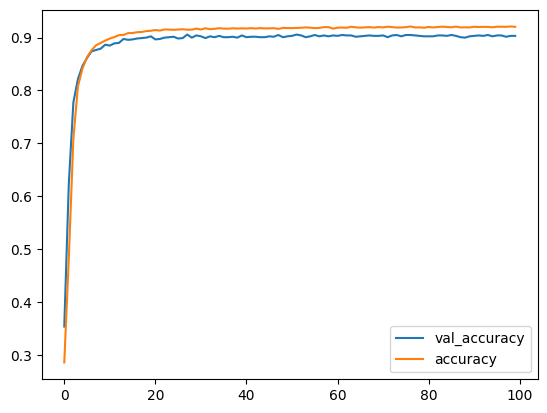

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(len(catatan.history['val_accuracy'])), catatan.history['val_accuracy'], label='val_accuracy')
plt.plot(range(len(catatan.history['accuracy'])), catatan.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

# Evaluasi Model¶

In [8]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy Model : ', acc)

94/94 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.9090
Accuracy Model :  0.9089999794960022


# Prediksi Model

In [9]:
model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


array([[1.67897940e-02, 5.68022532e-03, 1.30513245e-02, 9.64478672e-01],
       [7.97416449e-01, 1.42906532e-01, 4.88029756e-02, 1.08740572e-02],
       [5.19181958e-05, 6.62271166e-03, 9.86262798e-01, 7.06250081e-03],
       ...,
       [9.71757472e-01, 1.19575458e-02, 1.28371846e-02, 3.44772148e-03],
       [9.54130113e-01, 1.75270047e-02, 2.12247036e-02, 7.11823348e-03],
       [1.61935855e-03, 9.93622482e-01, 3.93500598e-03, 8.23229493e-04]],
      dtype=float32)

In [11]:
import numpy as np

y_pred = model.predict(x_test)
pred = np.argmax(y_pred, axis=1)
pred

94/94 [==============================] - 0s 2ms/step


array([3, 0, 2, ..., 0, 0, 1], dtype=int64)

# Evaluasi dengan Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred, y_test))

[[717  32  24  21]
 [  6 675  35   5]
 [  2  26 651  42]
 [ 24  16  40 684]]


# Simpan Model

In [15]:
model.save_weights('model.h5')